<h1>Descubra as melhores notas de matemática do ENEM 2016</h1>
<h2>Tópicos</h2>

<p>Neste desafio você aprenderá:</p>

<ul>
<li>Lógica</li>
<li>Análise de dados</li>
<li>Estatística</li>
<li>Regression</li>
</ul>

<h2>Detalhes</h2>

<p>O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o <a href="https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip">Dicionário dos Microdados do Enem 2016</a>.</p>

<p>Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:</p>

<ul>
<li>matemática: 3</li>
<li>ciências da natureza: 2</li>
<li>linguagens e códigos: 1.5</li>
<li>ciências humanas: 1</li>
<li>redação: 3</li>
</ul>

<p>No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna <strong>NU_NOTA_MT</strong>) de quem participou do ENEM 2016.</p>

<p>Salve sua resposta em um arquivo chamado answer.csv com duas colunas: <strong>NU_INSCRICAO</strong> e <strong>NU_NOTA_MT</strong>.</p>

<p>Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.</p>

<h2>Observações</h2>

<p>O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia.</p>

In [1]:
# Importando pacotes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns

In [2]:
# Carregando dataset já separando as colunas de interesse
dataset = pd.read_csv('train.csv',
                    usecols=['NU_INSCRICAO', 'NU_NOTA_CN',
                             'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_MT'])

In [3]:
# Mostrando as 5 primeiras linhas do dataset
dataset.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,436.3,495.4,581.2,399.4,520.0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,474.5,544.1,599.0,459.8,580.0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN,NaN,NaN,NaN,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN,NaN,NaN,NaN,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN,NaN,NaN,NaN,NaN


In [4]:
# Mostrando informações do dataset onde é possivel verificar uma que são 13720 registros sendo que existem
# mais de 3000 dados faltantes depedendo da coluna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 6 columns):
NU_INSCRICAO       13730 non-null object
NU_NOTA_CN         10341 non-null float64
NU_NOTA_CH         10341 non-null float64
NU_NOTA_LC         10133 non-null float64
NU_NOTA_MT         10133 non-null float64
NU_NOTA_REDACAO    10133 non-null float64
dtypes: float64(5), object(1)
memory usage: 643.7+ KB


In [5]:
# Subistituindo notas Nan por 0 provavelmente candidatos faltantes
'''Adotei está estratégia por jugar que tanto os candidatos ausentes ou mesmo os pegos cometendo algum
tipo de fraude ou simplesmente entreguem o gabarito em branco as notas atribuídas devam ser zero'''
dataset = dataset.fillna(0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 6 columns):
NU_INSCRICAO       13730 non-null object
NU_NOTA_CN         13730 non-null float64
NU_NOTA_CH         13730 non-null float64
NU_NOTA_LC         13730 non-null float64
NU_NOTA_MT         13730 non-null float64
NU_NOTA_REDACAO    13730 non-null float64
dtypes: float64(5), object(1)
memory usage: 643.7+ KB


In [6]:
# Verificando algumas métricas estáticas dos dados
dataset.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000
mean,356.621515,398.923911,381.166737,356.092607,390.447633
std,213.282315,237.174594,234.648409,228.844193,267.749316
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.625000,345.900000,0.000000,0.000000,0.000000
50%,433.100000,499.600000,486.000000,422.500000,480.000000
75%,493.200000,564.400000,548.300000,504.400000,580.000000
max,806.400000,807.000000,763.600000,952.000000,1000.000000


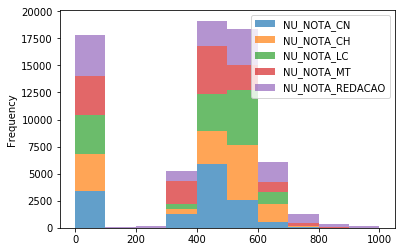

In [7]:
# Histogramas das notas
''' Pelo gráfico de freqências podemos verificar a maior frequência das notas se encontra entre 400 e
600, podemos notar também um alto número de  notas zeradas.
Curiosamente temos poucas notas máximas 1000 e somente em redação sabidamente a única que poderá ter 
nota atribuida máxima, todas as outras notas são atribuidas de acordo com cálculos estatísticos.'''
dataset.plot.hist(alpha=0.7, stacked=True)
plt.show()

In [8]:
# Verificando a correlação entre as diversas features incluindo a variável resposta
dataset.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.969323,0.920917,0.907039,0.857810
NU_NOTA_CH,0.969323,1.000000,0.934704,0.903608,0.871199
NU_NOTA_LC,0.920917,0.934704,1.000000,0.943954,0.904795
NU_NOTA_MT,0.907039,0.903608,0.943954,1.000000,0.875929
NU_NOTA_REDACAO,0.857810,0.871199,0.904795,0.875929,1.000000


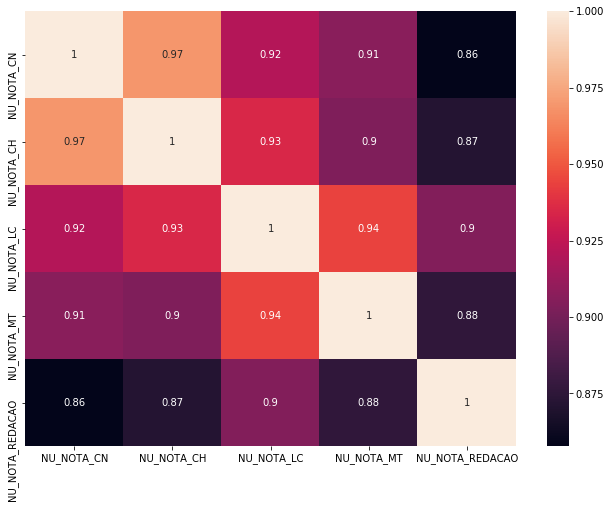

In [9]:
corr = dataset.corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})
plt.show()

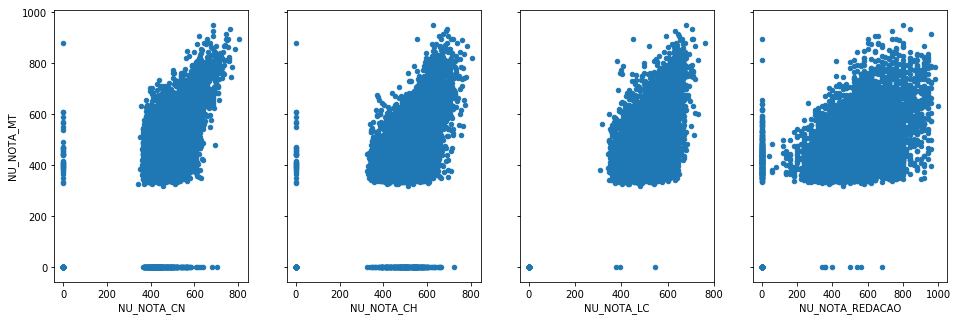

In [10]:
# Plots de cada feature x a váriavel de interesse no caso a nota de matemática
fig, axs = plt.subplots(1, 4, sharey=True)
dataset.plot(kind='scatter', x='NU_NOTA_CN', y='NU_NOTA_MT', ax= axs[0], figsize=(16, 5))
dataset.plot(kind='scatter', x='NU_NOTA_CH', y='NU_NOTA_MT', ax= axs[1])
dataset.plot(kind='scatter', x='NU_NOTA_LC', y='NU_NOTA_MT', ax= axs[2])
dataset.plot(kind='scatter', x='NU_NOTA_REDACAO', y='NU_NOTA_MT', ax= axs[3])
plt.show()

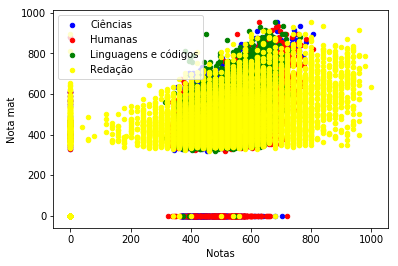

In [11]:
ax1 = dataset.plot(kind='scatter', x='NU_NOTA_CN', y='NU_NOTA_MT', color='blue',label='Ciências')
dataset.plot(kind='scatter', x='NU_NOTA_CH', y='NU_NOTA_MT', color='red',ax=ax1,label='Humanas')
dataset.plot(kind='scatter', x='NU_NOTA_LC', y='NU_NOTA_MT', color='green',ax=ax1,label='Linguagens e códigos')
dataset.plot(kind='scatter', x='NU_NOTA_REDACAO', y='NU_NOTA_MT', color='yellow',ax=ax1,label='Redação')
plt.xlabel('Notas')
plt.ylabel('Nota mat')
plt.legend()
plt.show()

In [12]:
# extraindo as matriz X
X = dataset.loc[:,['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO'] ].values
X[:5,:]

array([[436.3, 495.4, 581.2, 520. ],
       [474.5, 544.1, 599. , 580. ],
       [  0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ]])

In [13]:
# extraindo as matriz y
y = dataset.loc[:, ['NU_NOTA_MT']].values
y[:5]

array([[399.4],
       [459.8],
       [  0. ],
       [  0. ],
       [  0. ]])

In [14]:
# divisão em treinamento e teste no caso aqui separei 20% dos dados dos treino para ser usado como teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [15]:
# inserindo a coluna 1s na matriz X para computar o beta_0 intercept
from statsmodels.tools import add_constant
# normalizando todos os dados
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,:] = sc_X.fit_transform(X_train[:,:])
X_test[:,:] = sc_X.transform(X_test[:,:])
print(X_train[:10,:])

[[-1.67130354 -1.6809891  -1.62297745 -1.45535622]
 [ 1.43450718  1.1364538   1.02249348  0.48507072]
 [ 0.32632838  0.29653368  0.60929855  0.48507072]
 [ 0.55350269  0.26406688  0.52103091  0.63433433]
 [ 0.89144794  0.77468097  0.87921846  0.48507072]
 [ 0.22776102  0.62499642  0.77005654  0.41043892]
 [ 0.38077512  0.03806428 -0.05761256 -0.18661552]
 [ 0.75861668  0.91466766  1.1440214  -0.18661552]
 [ 0.59809269  0.55964118  0.74020758  0.33580711]
 [-1.67130354 -1.6809891  -1.62297745 -1.45535622]]


In [16]:
# import do modelo de regressão no caso regressâo linear
from sklearn.linear_model import LinearRegression

In [17]:
# regressor
regressor = LinearRegression(normalize=True)
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
#predição
y_pred = regressor.predict(X_test)
np.concatenate((np.round(y_pred), np.round(y_test),y_pred-y_test),axis=1)

array([[ -3.        ,   0.        ,  -2.92786148],
       [580.        , 663.        , -83.40495922],
       [427.        , 467.        , -40.10352422],
       ...,
       [438.        , 403.        ,  34.65980049],
       [ -3.        ,   0.        ,  -2.92786148],
       [466.        , 345.        , 121.58135561]])

In [19]:
y_pred[:10]

array([[ -2.92786148],
       [579.59504078],
       [426.79647578],
       [437.91649768],
       [496.89679644],
       [646.13927341],
       [412.01117704],
       [535.10601069],
       [455.63511445],
       [411.58325048]])

In [20]:
# Avaliando a qualidade do modelo 
'''O método score para a classe LinearRegression é o valor R^2 conhecido como fator de correlação 
sendo um valor entre 0 e 1'''
regressor.score(X_test,y_test)

0.9025184207872167

In [21]:
# Análise de resíduos
residuos = np.round((y_pred-y_test))
residuos

array([[ -3.],
       [-83.],
       [-40.],
       ...,
       [ 35.],
       [ -3.],
       [122.]])

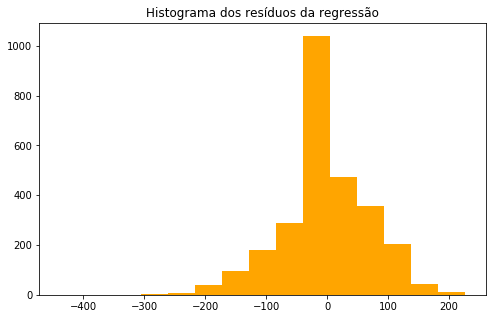

In [22]:
# Plotando histograma dos resíduos
# Lembre-se de que os resíduos precisam ter distribuição normal com média 0.
plt.rcParams["figure.figsize"] = (8,5)
plt.hist(residuos, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()

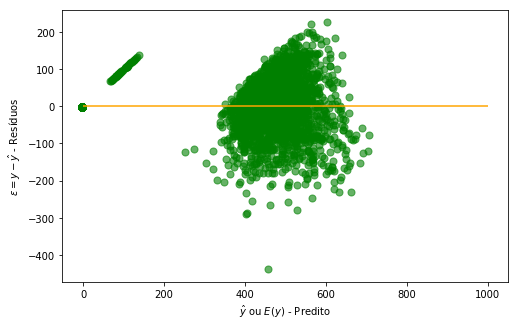

In [23]:
# plot do gráfico de dispersão (scatterplot) dos dos valores preditos (ŷ) e resíduos.
# É preciso que os resíduos e a variável resposta sejam não correlacionados.
plt.scatter(y=residuos, x=y_pred, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-0, xmax=1000, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

In [24]:
dataset_test = pd.read_csv('test.csv',
                           usecols=['NU_INSCRICAO', 'NU_NOTA_CN', 
                                    'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO'])
dataset_test.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,NaN,NaN,NaN,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0


In [25]:
reg_number = dataset_test.loc[:,['NU_INSCRICAO'] ]
reg_number.shape

(4576, 1)

In [26]:
# Preparando o dataframe para entrega caso eu escolha este modelo
answer={
'NU_NOTA_MT':  y_pred.flatten()
}
answer_df=pd.DataFrame(answer)
answer_df_reg = pd.concat([reg_number,answer_df], axis=1)
answer_df_reg.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,-2.927861
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,579.595041
2,b38a03232f43b11c9d0788abaf060f7366053b6d,426.796476
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,437.916498
4,715494628a50142ce8cb17191cfe6d0f3cae0934,496.896796


In [27]:
answer_df_reg.describe()

,NU_NOTA_MT
count,2746.000000
mean,358.469008
std,217.927070
min,-2.927861
25%,88.018045
50%,452.058006
75%,506.309397
max,707.223629


In [28]:
# inserindo a coluna 1s na matriz X para computar o beta_0 intercept
from statsmodels.tools import add_constant
Xtrain = np.copy(X_train)
Xtest = np.copy(X_test)
Xtrain = add_constant(Xtrain)
print(Xtrain[:10,:])

[[ 1.         -1.67130354 -1.6809891  -1.62297745 -1.45535622]
 [ 1.          1.43450718  1.1364538   1.02249348  0.48507072]
 [ 1.          0.32632838  0.29653368  0.60929855  0.48507072]
 [ 1.          0.55350269  0.26406688  0.52103091  0.63433433]
 [ 1.          0.89144794  0.77468097  0.87921846  0.48507072]
 [ 1.          0.22776102  0.62499642  0.77005654  0.41043892]
 [ 1.          0.38077512  0.03806428 -0.05761256 -0.18661552]
 [ 1.          0.75861668  0.91466766  1.1440214  -0.18661552]
 [ 1.          0.59809269  0.55964118  0.74020758  0.33580711]
 [ 1.         -1.67130354 -1.6809891  -1.62297745 -1.45535622]]


In [29]:
# importando OLS Ordinary Least Squares
from statsmodels.api import OLS

In [30]:
# definindo o primeiro (completo)
X_opt = Xtrain[:,[0, 1, 2 ,3, 4]]
y_opt = y_train

In [31]:
regressor_OLS = OLS(endog=y_opt, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.546e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:00:14   Log-Likelihood:                -62464.
No. Observations:               10984   AIC:                         1.249e+05
Df Residuals:                   10979   BIC:                         1.250e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        355.6452      0.681    522.111      0.000     354.310     356.980
x1            76.3362      2.816     27.110      0.000      70.817      81.856
x2           -30.4331      3.100     -9.818      0.000     -36.509     -24.357
x3           154.1114      2.270     67.885      0.000     149.661     158.561
x4            22.0087      1.616     13.621      0.000      18.841      25.176
==============================================================================
Omnibus:                      733.473   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1574.236
Skew:                           0.445   Prob(JB):                         0.00
Kurtosis:                       4.628   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
y_train.reshape(10984,)
y_train.shape

(10984, 1)

In [33]:
regressor.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
regressor.score(X_test, y_test)

0.9025184207872167

In [37]:
from sklearn.neural_network import MLPRegressor

In [38]:
nn = 20
#nl = 1
mlp = MLPRegressor(hidden_layer_sizes=(nn, ),
                  max_iter=1000,
                  activation='relu',
                  solver='adam',
                  learning_rate='constant')

In [41]:
mlp.fit(X_train,y_train.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [42]:
y_pred_nn = mlp.predict(X_test)
y_pred_nn[:10]

array([6.38343594e-01, 5.85693612e+02, 4.47497849e+02, 4.39484122e+02,
       4.85542789e+02, 7.31190489e+02, 4.42713816e+02, 4.99382290e+02,
       4.51952613e+02, 4.17556005e+02])

In [43]:
# Avaliando a qualidade do modelo 
'''O método score para a classe MLPRegressor é o valor R^2 conhecido como fator de correlação 
sendo um valor entre 0 e 1'''
mlp.score(X_test,y_test)

0.9222976800105764

In [44]:
# Análise de resíduos
residuos = np.round((y_pred_nn.reshape(-1,1)-y_test.reshape(-1,1)))
residuos

array([[  1.],
       [-77.],
       [-19.],
       ...,
       [ 45.],
       [  1.],
       [121.]])

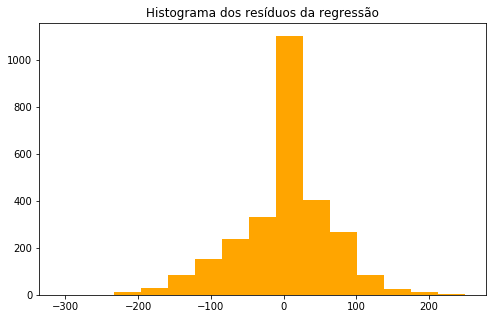

In [45]:
# Plotando histograma dos resíduos
# Lembre-se de que os resíduos precisam ter distribuição normal com média 0.
plt.rcParams["figure.figsize"] = (8,5)
plt.hist(residuos, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()

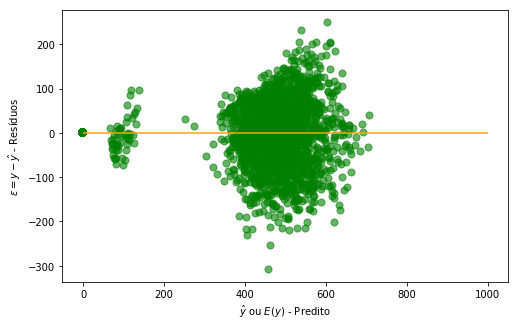

In [46]:
# plot do gráfico de dispersão (scatterplot) dos dos valores preditos (ŷ) e resíduos.
# É preciso que os resíduos e a variável resposta sejam não correlacionados.
plt.scatter(y=residuos, x=y_pred, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-0, xmax=1000, color='orange')
plt.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
plt.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
plt.show()

In [47]:
dataset_test = pd.read_csv('test.csv',
                           usecols=['NU_INSCRICAO', 'NU_NOTA_CN', 
                                    'NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO'])

In [48]:
dataset_test.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,NaN,NaN,NaN,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0


In [49]:
# Subistituindo notas Nan por 0 provavelmente candidatos faltantes
dataset_test = dataset_test.replace(np.nan,0)
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 5 columns):
NU_INSCRICAO       4576 non-null object
NU_NOTA_CN         4576 non-null float64
NU_NOTA_CH         4576 non-null float64
NU_NOTA_LC         4576 non-null float64
NU_NOTA_REDACAO    4576 non-null float64
dtypes: float64(4), object(1)
memory usage: 178.8+ KB


In [50]:
dataset_test.head()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,464.8,443.5,431.8,420.0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,391.1,491.1,548.0,580.0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.9,622.7,613.6,320.0
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.0,0.0,0.0,0.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,592.9,492.6,571.4,320.0


In [51]:
# extraindo as matrizes X
X_test_answer = dataset_test.loc[:,['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO'] ].values
X_test_answer[:10,:]

array([[464.8, 443.5, 431.8, 420. ],
       [391.1, 491.1, 548. , 580. ],
       [595.9, 622.7, 613.6, 320. ],
       [  0. ,   0. ,   0. ,   0. ],
       [592.9, 492.6, 571.4, 320. ],
       [414.5, 568.5, 542.5, 560. ],
       [485.7, 654.6, 606.6, 620. ],
       [423.2, 521. , 451.8, 420. ],
       [414.4, 577.6, 548.6, 740. ],
       [456.8, 518.5, 488.7, 580. ]])

In [52]:
# Aplicando a normalização para a base de testes
X_test_answer[:,:] = sc_X.transform(X_test_answer[:,:])
print(X_test_answer[:10,:])

[[ 0.5103208   0.18901378  0.21827714  0.1119117 ]
 [ 0.16439628  0.38971759  0.71376992  0.70896614]
 [ 1.12566277  0.94460457  0.99349735 -0.26124733]
 [-1.67130354 -1.6809891  -1.62297745 -1.45535622]
 [ 1.11158172  0.39604229  0.81355074 -0.26124733]
 [ 0.27422849  0.71607209  0.69031717  0.63433433]
 [ 0.60841879  1.07910985  0.96364838  0.85822975]
 [ 0.31506354  0.51578993  0.30355989  0.1119117 ]
 [ 0.27375912  0.75444194  0.71632841  1.30602058]
 [ 0.47277132  0.50524877  0.46090657  0.70896614]]


In [53]:
#predição
y_pred = mlp.predict(X_test)
y_pred[:20]

array([6.38343594e-01, 5.85693612e+02, 4.47497849e+02, 4.39484122e+02,
       4.85542789e+02, 7.31190489e+02, 4.42713816e+02, 4.99382290e+02,
       4.51952613e+02, 4.17556005e+02, 4.64649384e+02, 4.61898320e+02,
       4.41895027e+02, 4.51109873e+02, 4.38537236e+02, 6.38343594e-01,
       4.18242678e+02, 5.19882007e+02, 5.63421674e+02, 6.38343594e-01])

In [54]:
y_pred.shape

(2746,)

In [55]:
reg_number = dataset_test.loc[:,['NU_INSCRICAO'] ]
reg_number.shape

(4576, 1)

In [56]:
# Preparando o dataframe para entrega
answer={
'NU_NOTA_MT':  y_pred
}
answer_df=pd.DataFrame(answer)
answer_df_reg = pd.concat([reg_number,answer_df], axis=1)
answer_df_reg.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,0.638344
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,585.693612
2,b38a03232f43b11c9d0788abaf060f7366053b6d,447.497849
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,439.484122
4,715494628a50142ce8cb17191cfe6d0f3cae0934,485.542789


In [57]:
answer_df_reg.describe()

,NU_NOTA_MT
count,2746.000000
mean,357.950739
std,220.177295
min,-72.813554
25%,0.638344
50%,447.110329
75%,482.766283
max,825.725284


In [58]:
# Salvando arquivo 'answer.csv' submetido
answer_df_reg.to_csv('answer.csv',index=False)